In [1]:
%matplotlib inline

In [4]:
from __future__ import division
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
#from mayavi import mlab
import seaborn as sns
from vtk_rw import read_vtk, write_vtk
from plotting import plot_surf_stat_map

/scr/ilz1/cbspython_surf/surfenv/local/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [5]:
def make_cmap(c):
    #cmap = np.asarray(sns.cubehelix_palette(c-1, start=.5, rot=-.75, reverse=True))
    #cmap = np.asarray(sns.color_palette('cubehelix', c-1))
    cmap = np.asarray(sns.color_palette('Reds', c-1))
    cmap = np.concatenate((np.array([[0.4,0.4,0.4]]), cmap), axis=0)
    cmap = np.concatenate((cmap, np.ones((c,1))), axis=1)
    cmap_seaborn = [tuple(cmap[i]) for i in range(len(cmap))]

    cmap_255=np.zeros_like(cmap)
    for row in range(cmap.shape[0]):
        cmap_255[row]=[np.floor(i * 255) for i in cmap[row]]
    cmap_255=cmap_255.astype(int)
    
    return cmap_seaborn, cmap_255

In [6]:
mesh_file='/scr/ilz3/myelinconnect/all_data_on_simple_surf/surfs/lowres_rh_d.vtk'
sulc_file='/scr/ilz3/myelinconnect/all_data_on_simple_surf/surfs/lowres_rh_sulc.npy'
mask_file='/scr/ilz3/myelinconnect/all_data_on_simple_surf/masks/rh_mask.npy'
#data_file='/scr/ilz3/myelinconnect/all_data_on_simple_surf/missampled/corr/rh_smooth_3_thr_per_session_corr_rowsum.npy'
data_file='/scr/ilz3/myelinconnect/all_data_on_simple_surf/clust/smooth_3/mask_02_4/t1_embed/rh_t1embed_10_layer_3_7.npy'

In [15]:
data=np.load(data_file)
sulc=np.load(sulc_file)
mask=np.load(mask_file)
data[mask]=0
v, f, d = read_vtk(mesh_file)

In [18]:
data_masked=np.delete(data,mask, axis=0)

In [19]:
data_masked.shape

(68230, 10)

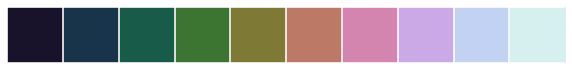

In [28]:
sns.palplot(sns.color_palette('cubehelix',10))

In [37]:
import pickle
pkl_file = open('/scr/ilz3/myelinconnect/all_data_on_simple_surf/clust/smooth_3/mask_02_4/t1_embed/rh_t1embed_10_layer_3_7_dict.pkl', 'rb')
res = pickle.load(pkl_file)
pkl_file.close()
eigenval=res['lambdas']

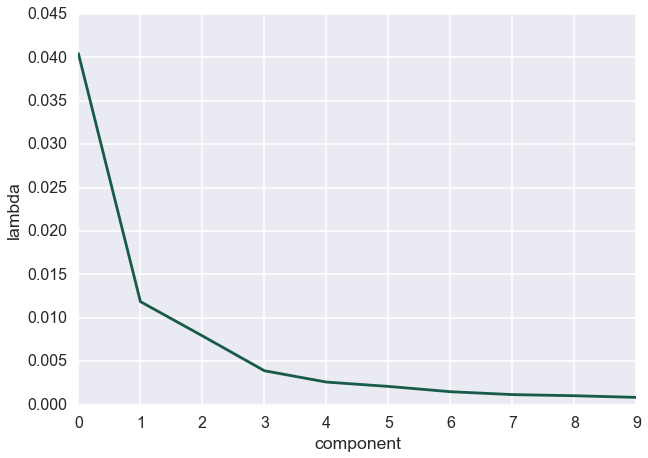

In [39]:
sns.set_context('poster')
fig=plt.figure(figsize=(10,7))
plt.plot(eigenval, color=sns.color_palette('cubehelix', 10)[2])
plt.ylabel('lambda')
plt.xlabel('component')

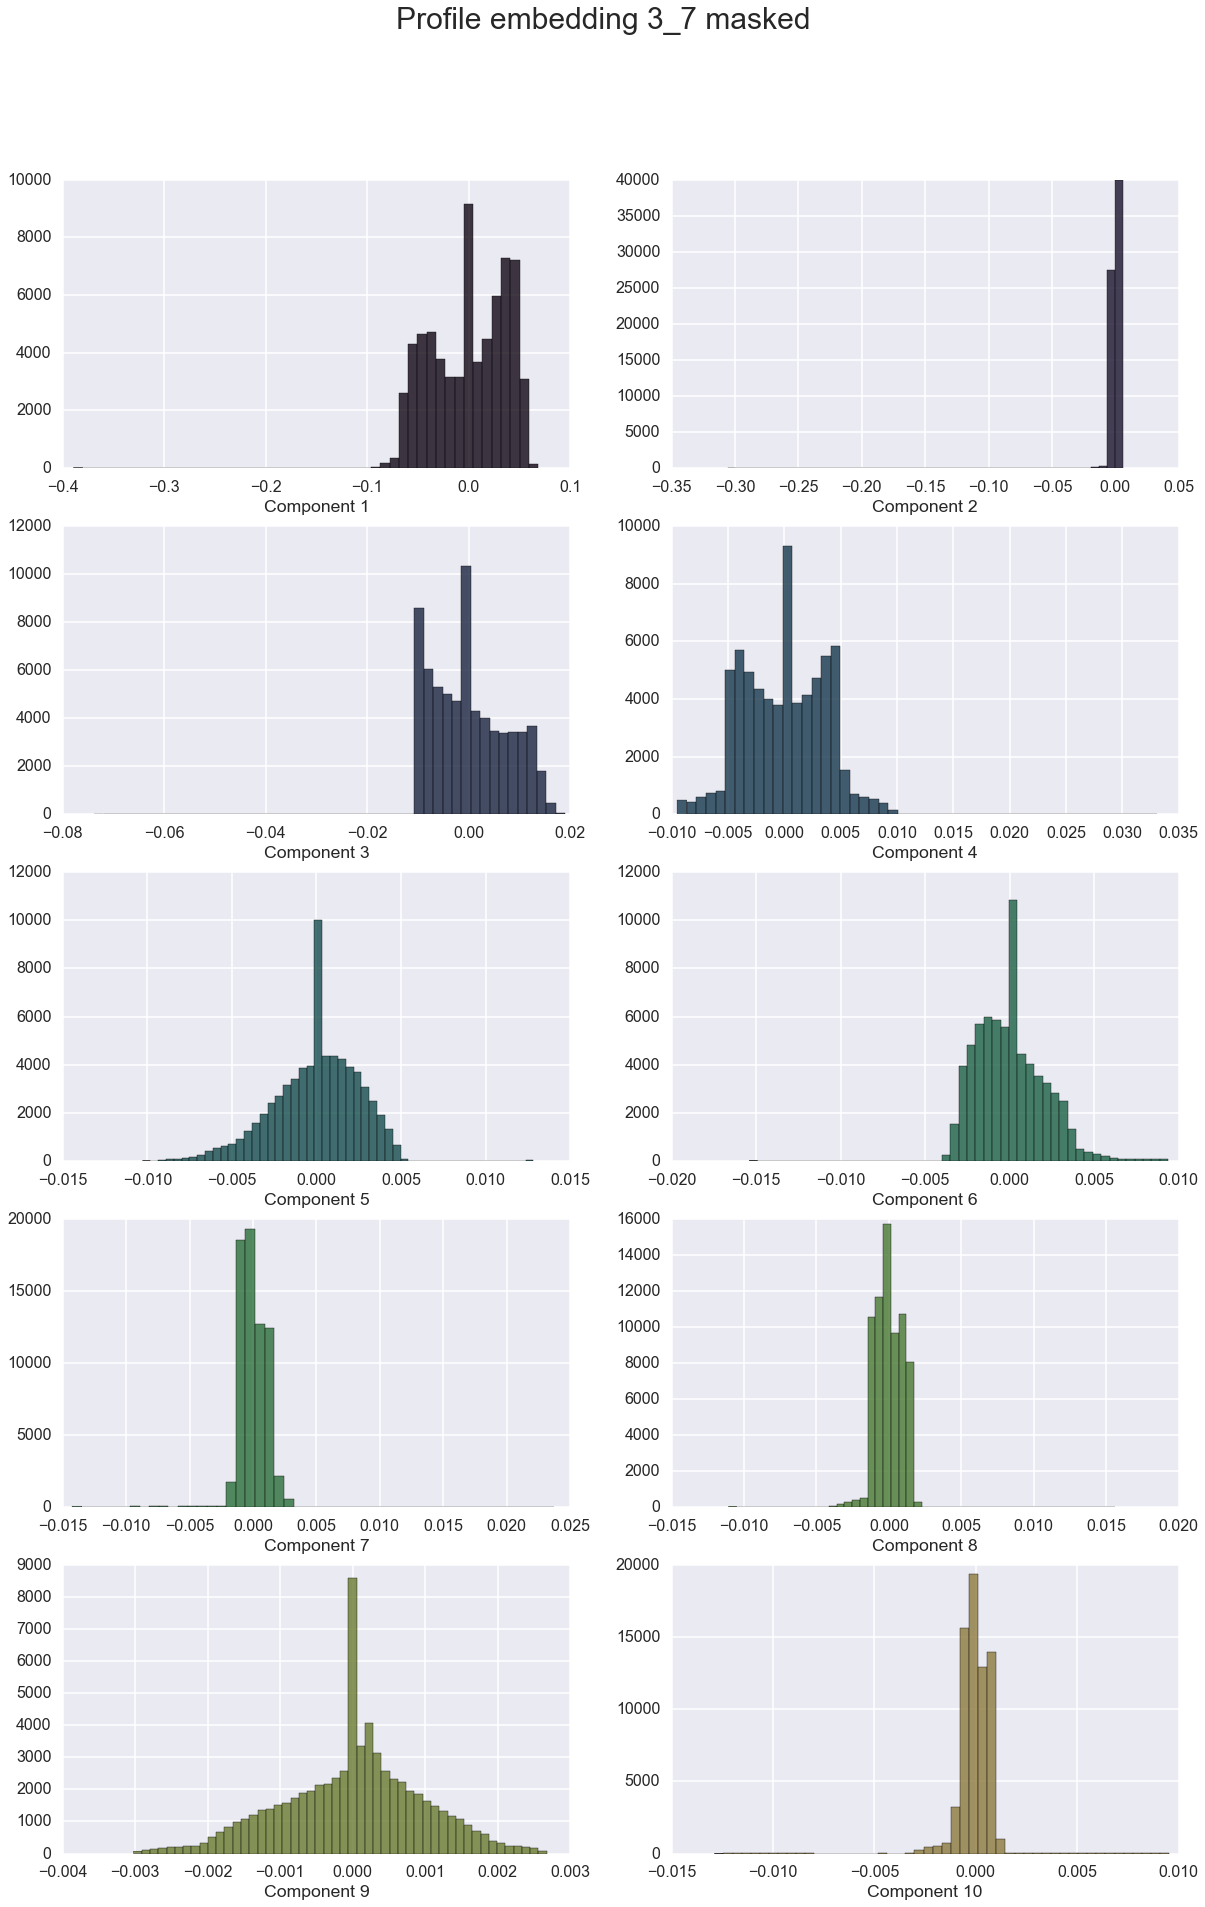

In [34]:
sns.set_context('poster')
sns.set_style('darkgrid')
fig=plt.figure(figsize=(20,30))
for comp in range(10):
    fig.add_subplot(5,2,comp+1)
    plt.hist(data_masked[:,comp], bins=50, color=sns.color_palette('cubehelix',20)[comp], alpha=0.8);
    plt.xlabel('Component %s'%str(comp+1))
fig.suptitle('Profile embedding 3_7 masked', fontsize=30)
#plt.xticks(np.arange(0, max(data_masked)+1, 1000))
#plt.xlim(min(data_masked), max(data_masked))

#fig.add_subplot(212)
#plt.hist(data_norm, bins=30, color=sns.color_palette('cubehelix',10)[5], alpha=0.8);
#plt.xticks(np.arange(-2, +3, 0.2))
#plt.xlim(min(data_norm), max(data_norm))
#plt.xlabel('normalized row sum')
fig.savefig('/scr/ilz3/myelinconnect/pics/profile_embedding_37_hist.png')

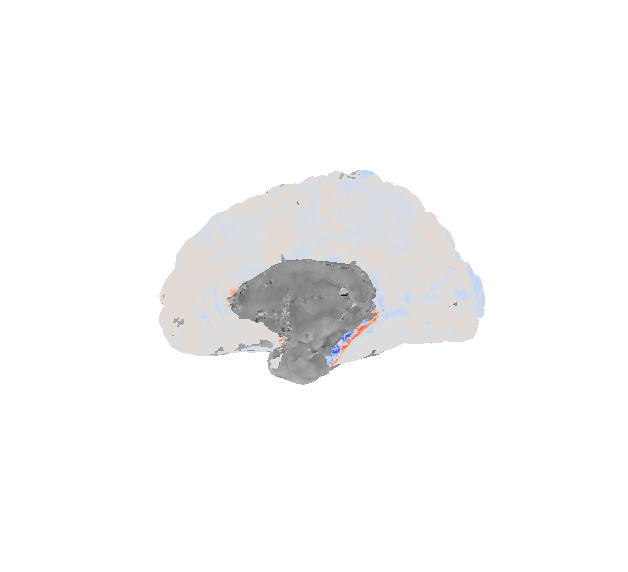

In [60]:
sns.set_context('poster')
sns.set_style('white')
plot = plot_surf_stat_map(v, f, stat_map=data[:,9], threshold=0.000000001, bg_map=sulc, elev=180, azim=180, figsize=(11,10))

In [ ]:
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))

plt.imshow(gradient, aspect='auto', cmap=cbar)
plt.axis('off')

In [ ]:
x=v[:,0]
y=v[:,1]
z=v[:,2]
triangles=f
pal, pal_255 = make_cmap(10)

In [ ]:
sns.palplot(pal)

In [ ]:
data_thr=data[:,0]
data_thr[mask]=0
data_thr[np.where(data_masked[:,0]<-0.1)]=-0.1

In [ ]:
np.where(data_masked[:,0]<-0.1)[0].shape

In [ ]:
mlab.figure(bgcolor=(1, 1, 1))
img = mlab.triangular_mesh(x,y,z,triangles,scalars=data_thr, colormap='RdBu')
#lut = img.module_manager.scalar_lut_manager.lut.table.to_array()
#img.module_manager.scalar_lut_manager.lut.table = pal_255
mlab.draw()
mlab.show()

In [ ]:
data[:,0].shape